# Comparative Analysis of Classification Convergence: From Linear Regression to Iterative Neural Models

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [16]:

# Generating a synthetic dataset for a binary classification task
X, y = make_classification(n_samples=500, n_features=10, n_informative=5, random_state=0)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Initializing models with parameters to observe convergence
# Logistic Regression with SAGA solver (Stochastic Average Gradient)
model_logreg = LogisticRegression(solver='saga', max_iter=1000, tol=1e-4, verbose=1)

# MLP (Multi-Layer Perceptron) with Adam solver and 1000 maximum iterations
model_mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=1000, tol=1e-4, solver='adam', verbose=True, random_state=0)

# Training models and retrieving loss at each iteration
print("Entraînement de la régression logistique...")
model_logreg.fit(X_train, y_train)

print("Entraînement du MLP...")
model_mlp.fit(X_train, y_train)




Entraînement de la régression logistique...
convergence after 31 epochs took 0 seconds
Entraînement du MLP...
Iteration 1, loss = 0.58007549
Iteration 2, loss = 0.55622606
Iteration 3, loss = 0.53351693
Iteration 4, loss = 0.51363482
Iteration 5, loss = 0.49682784
Iteration 6, loss = 0.48127396
Iteration 7, loss = 0.46740131
Iteration 8, loss = 0.45518264
Iteration 9, loss = 0.44411778
Iteration 10, loss = 0.43448829
Iteration 11, loss = 0.42484025
Iteration 12, loss = 0.41646659
Iteration 13, loss = 0.40848254
Iteration 14, loss = 0.40133958
Iteration 15, loss = 0.39439270
Iteration 16, loss = 0.38781949
Iteration 17, loss = 0.38209658
Iteration 18, loss = 0.37667523
Iteration 19, loss = 0.37159906
Iteration 20, loss = 0.36656779
Iteration 21, loss = 0.36202734
Iteration 22, loss = 0.35761202
Iteration 23, loss = 0.35358148
Iteration 24, loss = 0.34950923
Iteration 25, loss = 0.34580296
Iteration 26, loss = 0.34225379
Iteration 27, loss = 0.33894144
Iteration 28, loss = 0.33564503
Ite

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Iteration 293, loss = 0.16162982
Iteration 294, loss = 0.16135848
Iteration 295, loss = 0.16108132
Iteration 296, loss = 0.16081795
Iteration 297, loss = 0.16058895
Iteration 298, loss = 0.16029789
Iteration 299, loss = 0.16003421
Iteration 300, loss = 0.15985082
Iteration 301, loss = 0.15960899
Iteration 302, loss = 0.15935639
Iteration 303, loss = 0.15906367
Iteration 304, loss = 0.15881509
Iteration 305, loss = 0.15858725
Iteration 306, loss = 0.15828081
Iteration 307, loss = 0.15803022
Iteration 308, loss = 0.15787177
Iteration 309, loss = 0.15755472
Iteration 310, loss = 0.15729848
Iteration 311, loss = 0.15704412
Iteration 312, loss = 0.15675078
Iteration 313, loss = 0.15649791
Iteration 314, loss = 0.15629114
Iteration 315, loss = 0.15598499
Iteration 316, loss = 0.15577501
Iteration 317, loss = 0.15551903
Iteration 318, loss = 0.15525092
Iteration 319, loss = 0.15505735
Iteration 320, loss = 0.15483968
Iteration 321, loss = 0.15451874
Iteration 322, loss = 0.15427390
Iteration 

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(50,), max_iter=1000, random_state=0,
              verbose=True)

In [17]:
# Prediction and evaluation on the test data
y_pred_logreg = model_logreg.predict(X_test)
y_pred_mlp = model_mlp.predict(X_test)

# Calculation of accuracy
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)

# Display of accuracies
print(f"Précision de la régression logistique : {accuracy_logreg}")
print(f"Précision du MLP : {accuracy_mlp}")


Précision de la régression logistique : 0.83
Précision du MLP : 0.89


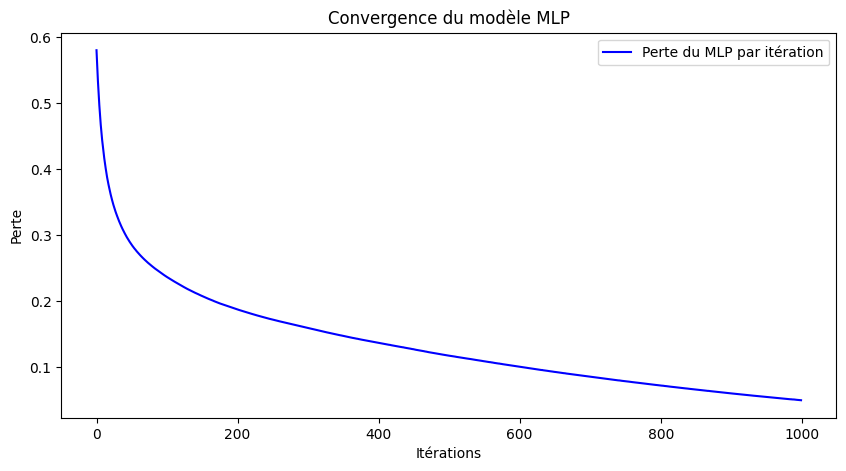

In [18]:
plt.figure(figsize=(10, 5))
plt.plot(model_mlp.loss_curve_, label="Perte du MLP par itération", color='blue')
plt.xlabel("Itérations")
plt.ylabel("Perte")
plt.title("Convergence du modèle MLP")
plt.legend()
plt.show()

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, log_loss

# Generating a synthetic dataset for a binary classification task
X, y = make_classification(n_samples=500, n_features=10, n_informative=5, random_state=0)

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Initializing Logistic Regression with SAGA and warm_start to capture the loss at each iteration
model_logreg = LogisticRegression(solver='saga', max_iter=1, warm_start=True, tol=1e-4, random_state=0)

# Initializing the MLP (Multi-Layer Perceptron)
model_mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=1000, tol=1e-4, solver='adam', verbose=True, random_state=0)

# List to store the logistic regression loss at each iteration
loss_logreg = []

# Training the Logistic Regression and recording the loss
print("Entraînement de la régression logistique...")
for _ in range(100):  # Limited to 100 iterations to observe convergence
    model_logreg.fit(X_train, y_train)
# Calculating the loss for the training set (log-loss)
    y_prob = model_logreg.predict_proba(X_train)
    loss_logreg.append(log_loss(y_train, y_prob))

# Training the MLP
print("Entraînement du MLP...")
model_mlp.fit(X_train, y_train)



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which 

Entraînement de la régression logistique...


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which 

Entraînement du MLP...
Iteration 1, loss = 0.58007549
Iteration 2, loss = 0.55622606
Iteration 3, loss = 0.53351693
Iteration 4, loss = 0.51363482
Iteration 5, loss = 0.49682784
Iteration 6, loss = 0.48127396
Iteration 7, loss = 0.46740131
Iteration 8, loss = 0.45518264
Iteration 9, loss = 0.44411778
Iteration 10, loss = 0.43448829
Iteration 11, loss = 0.42484025
Iteration 12, loss = 0.41646659
Iteration 13, loss = 0.40848254
Iteration 14, loss = 0.40133958
Iteration 15, loss = 0.39439270
Iteration 16, loss = 0.38781949
Iteration 17, loss = 0.38209658
Iteration 18, loss = 0.37667523
Iteration 19, loss = 0.37159906
Iteration 20, loss = 0.36656779
Iteration 21, loss = 0.36202734
Iteration 22, loss = 0.35761202
Iteration 23, loss = 0.35358148
Iteration 24, loss = 0.34950923
Iteration 25, loss = 0.34580296
Iteration 26, loss = 0.34225379
Iteration 27, loss = 0.33894144
Iteration 28, loss = 0.33564503
Iteration 29, loss = 0.33249465
Iteration 30, loss = 0.32968256
Iteration 31, loss = 0.326

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(50,), max_iter=1000, random_state=0,
              verbose=True)

In [20]:
# Prediction and evaluation on test data
y_pred_logreg = model_logreg.predict(X_test)
y_pred_mlp = model_mlp.predict(X_test)

# Accuracy calculation
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)

# Displaying accuracies
print(f"Précision de la régression logistique : {accuracy_logreg}")
print(f"Précision du MLP : {accuracy_mlp}")

Précision de la régression logistique : 0.85
Précision du MLP : 0.89


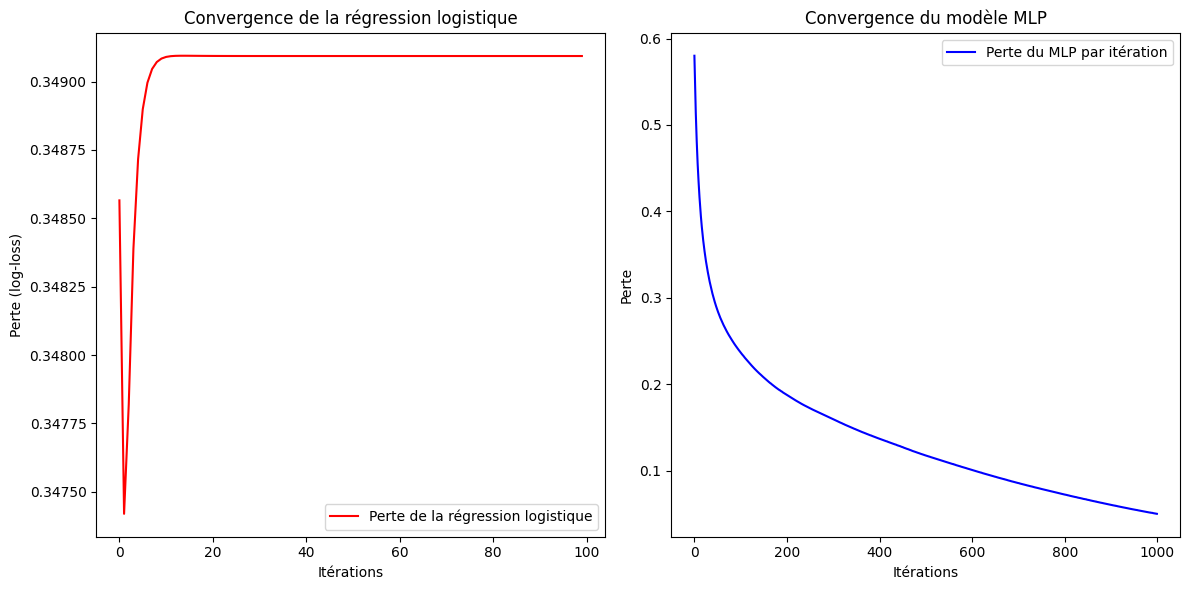

In [21]:
# Plotting the convergence for both models
plt.figure(figsize=(12, 6))

# Loss curve for Logistic Regression
plt.subplot(1, 2, 1)
plt.plot(loss_logreg, label="Perte de la régression logistique", color='red')
plt.xlabel("Itérations")
plt.ylabel("Perte (log-loss)")
plt.title("Convergence de la régression logistique")
plt.legend()

# Loss curve for the MLP
plt.subplot(1, 2, 2)
plt.plot(model_mlp.loss_curve_, label="Perte du MLP par itération", color='blue')
plt.xlabel("Itérations")
plt.ylabel("Perte")
plt.title("Convergence du modèle MLP")
plt.legend()

plt.tight_layout()
plt.show()

## Analysis and Interpretation of Model Convergence

### 1. The Nature and Significance of Convergence
In this study, convergence represents the process where the optimization algorithm (Gradient Descent variants) successfully navigates the loss surface to find a stable minimum. It is the critical transition point where a model stops *learning* and reaches its optimal predictive state. Proper convergence ensures that the model has captured the underlying patterns in the dataset without prematurely halting or indefinitely oscillating.

### 2. Comparative Speed: Logistic Regression vs. MLP
There is a stark contrast in the convergence profiles of the two models:

- **Logistic Regression (Red Plot)** converges almost instantly, reaching a stable plateau within roughly **10 iterations**. This is because it is a linear model with a convex loss function, meaning there is a single, clear global minimum to find.
- **MLP (Multi-Layer Perceptron) (Blue Plot)** requires a significantly higher number of iterations (up to **1000**) to stabilize. As a non-linear model with hidden layers, it must optimize thousands of interconnected weights across a non-convex loss landscape, which is mathematically more complex and time-consuming.

### 3. Loss Curve Dynamics and Feature Representation
The smooth, progressive decline in the MLP's loss curve indicates a hierarchical learning process. Unlike Logistic Regression, which finds a linear decision boundary, the MLP simultaneously learns feature representations in its hidden layers and the final classification. This added complexity explains why the loss continues to decrease long after the Logistic Regression model has converged.

### 4. Solver Efficiency: SAGA vs. ADAM
The choice of solver fundamentally impacts convergence behavior:

- **SAGA** is highly efficient for Logistic Regression. It is a memory-efficient variant of Stochastic Gradient Descent optimized for linear problems, allowing rapid convergence.
- **ADAM (Adaptive Moment Estimation)**, used for the MLP, is more sophisticated. It computes adaptive learning rates for each parameter, helping the model avoid saddle points and flat regions in the loss surface, even if it results in slower convergence.

### 5. Diagnostic Insights from Curve Oscillations
A smooth, downward-sloping loss curve (as observed) indicates well-tuned hyperparameters.  
Conversely, oscillations in the loss curve would suggest:
- A learning rate (`α`) that is too high, causing overshooting.
- Poor feature scaling, where variables with different magnitudes disrupt optimization stability.

### 6. Computational Resource Trade-offs
The experiments highlight a clear trade-off between performance and computational cost:

- **Logistic Regression** is computationally inexpensive and fast but plateaus at a higher loss (≈ **0.34**).
- **MLP** is computationally intensive and slower but achieves a significantly lower loss (≈ **0.05**), making it preferable for complex tasks requiring high precision.

### 7. Optimization and Parameter Tuning
Further improvements can be achieved through targeted adjustments:

- **Logistic Regression**: Increasing the `tol` (tolerance) parameter can reduce training time by stopping when improvements become marginal.
- **MLP**: Applying **Feature Scaling** (e.g., `StandardScaler`) is the most effective way to accelerate convergence. Normalized inputs ensure consistent gradient steps in all directions, significantly reducing the number of required iterations.

### 8. Final Evaluation of Model Performance
While convergence speed reflects computational efficiency, it does not equate to model quality. The MLP delivers superior accuracy due to its expressive architecture, which captures complex patterns in the data. In machine learning practice, a slower-converging model that reaches a lower final loss is often preferred over a fast model that settles for a suboptimal solution.
